# Diabetes impact on Hospital Stay

# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset 

In [2]:
df=pd.read_csv('C:/Users/APolanco/OneDrive - Healthfirst/diabetic_data.csv')

# The initial of my data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
# here am able to see more detail of information of the data
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Checking all the columns name in the dataset

In [6]:
df.columns


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

# Data Cleaning and Transformation
# Convert colums to appropriate data types

In [7]:
df['admission_type_id']=pd.to_datetime(df['admission_type_id'])

In [8]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,1970-01-01 00:00:00.000000006,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1970-01-01 00:00:00.000000001,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1970-01-01 00:00:00.000000001,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1970-01-01 00:00:00.000000001,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1970-01-01 00:00:00.000000001,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Checking how many columns and rows the dataset has

In [9]:
# there 101766 row and 50 columns

df.shape

(101766, 50)

In [10]:
missing_values=df.isnull().sum()

In [11]:
missing_values

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [12]:
unique_values=df.nunique()


In [13]:
unique_values

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [14]:
# the number of days patients stay in the hospital. 
# here summarize the mean,std, min of the day and max and a percentange of the time of patients stay at the hospital.

print(df['time_in_hospital'].describe())

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64


# Most of the people who when to the hospital were diabetesMed prescribed


In [15]:
print(df['diabetesMed'].describe())

count     101766
unique         2
top          Yes
freq       78363
Name: diabetesMed, dtype: object


# Top race who admit at the hospital with diabetes are caucasian

In [16]:
print(df['race'].describe())

count        101766
unique            6
top       Caucasian
freq          76099
Name: race, dtype: object


In [17]:
# The columns i will keep to change my dataset
columns_to_keep=['race','gender','age','time_in_hospital','number_diagnoses','diabetesMed','number_emergency','readmitted']

In [18]:

subset_df=df[columns_to_keep]

In [19]:
#check if the columns i select display
subset_df.head()

,race,gender,age,time_in_hospital,number_diagnoses,diabetesMed,number_emergency,readmitted
0,Caucasian,Female,[0-10),1,1,No,0,NO
1,Caucasian,Female,[10-20),3,9,Yes,0,>30
2,AfricanAmerican,Female,[20-30),2,6,Yes,0,NO
3,Caucasian,Male,[30-40),2,7,Yes,0,NO
4,Caucasian,Male,[40-50),1,5,Yes,0,NO


In [20]:
# check the missing values
missing_values=subset_df.isnull().sum()

In [21]:
# there is no missing values
missing_values

race                0
gender              0
age                 0
time_in_hospital    0
number_diagnoses    0
diabetesMed         0
number_emergency    0
readmitted          0
dtype: int64

In [22]:
# Check every values
subset_df['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [23]:
subset_df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [24]:
subset_df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [25]:
subset_df['time_in_hospital'].unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14],
      dtype=int64)

In [26]:
subset_df['number_diagnoses'].unique()

array([ 1,  9,  6,  7,  5,  8,  3,  4,  2, 16, 12, 13, 15, 10, 11, 14],
      dtype=int64)

In [27]:
subset_df['diabetesMed'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
subset_df['number_emergency'].unique()

array([ 0,  1,  2,  4,  3,  9,  5,  7,  6,  8, 22, 25, 10, 13, 42, 16, 11,
       28, 15, 14, 18, 12, 21, 20, 19, 46, 76, 37, 64, 63, 54, 24, 29],
      dtype=int64)

In [29]:
subset_df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [30]:
#Checking the Data Type

subset_df.dtypes

race                object
gender              object
age                 object
time_in_hospital     int64
number_diagnoses     int64
diabetesMed         object
number_emergency     int64
readmitted          object
dtype: object

In [31]:
# group by 'time_in_hospital'
time_grouped=subset_df.groupby('time_in_hospital').size()

In [32]:
time_grouped

time_in_hospital
1     14208
2     17224
3     17756
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
dtype: int64

In [33]:
# group by 'age'  this number of people by the age who were in the hospital because diabetes
age_grouped=subset_df.groupby('age').size()

In [34]:
age_grouped

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
dtype: int64

In [35]:
# group by 'diabetesMed '
diabetesMed_grouped=subset_df.groupby('diabetesMed') .size()

In [36]:
# The data show that 78363 patient were precribed with medication.

diabetesMed_grouped

diabetesMed
No     23403
Yes    78363
dtype: int64

In [37]:
gender_grouped=subset_df.groupby('gender') .size()

In [38]:
gender_grouped

gender
Female             54708
Male               47055
Unknown/Invalid        3
dtype: int64

In [39]:
race_grouped=subset_df.groupby('race').size()

In [40]:
race_grouped

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
dtype: int64

In [41]:
initial_comparison_group=subset_df[subset_df['race']=='Caucasian']

In [42]:
initial_comparison_group

,race,gender,age,time_in_hospital,number_diagnoses,diabetesMed,number_emergency,readmitted
0,Caucasian,Female,[0-10),1,1,No,0,NO
1,Caucasian,Female,[10-20),3,9,Yes,0,>30
3,Caucasian,Male,[30-40),2,7,Yes,0,NO
4,Caucasian,Male,[40-50),1,5,Yes,0,NO
5,Caucasian,Male,[50-60),3,9,Yes,0,>30
...,...,...,...,...,...,...,...,...
101758,Caucasian,Female,[80-90),5,9,Yes,1,NO
101759,Caucasian,Male,[80-90),1,7,Yes,0,NO
101763,Caucasian,Male,[70-80),1,13,Yes,0,NO
101764,Caucasian,Female,[80-90),10,9,Yes,0,NO


In [43]:
initial_comparison_group['race'].value_counts()

race
Caucasian    76099
Name: count, dtype: int64

In [44]:
female_Caucasian_population=initial_comparison_group[initial_comparison_group['gender']=='Female'].shape[0]
male_Caucasian_population=initial_comparison_group[initial_comparison_group['gender']=='Male'].shape[0]

In [45]:
female_Caucasian_population

39689

In [46]:
male_Caucasian_population

36410

In [47]:
gender_time_in_hospital=initial_comparison_group.groupby('gender')['time_in_hospital'].sum().sort_values(ascending=False)

In [48]:
gender_time_in_hospital

gender
Female    177864
Male      155885
Name: time_in_hospital, dtype: int64

In [49]:
gender_diabetes_grouped=initial_comparison_group.groupby(['gender','diabetesMed']).size().reset_index(name='count')

In [50]:
gender_diabetes_grouped

,gender,diabetesMed,count
0,Female,No,9519
1,Female,Yes,30170
2,Male,No,8130
3,Male,Yes,28280


In [51]:
diabetesMed_grouped

diabetesMed
No     23403
Yes    78363
dtype: int64

# the plot display of my data information


In [52]:
import matplotlib.pyplot as plt

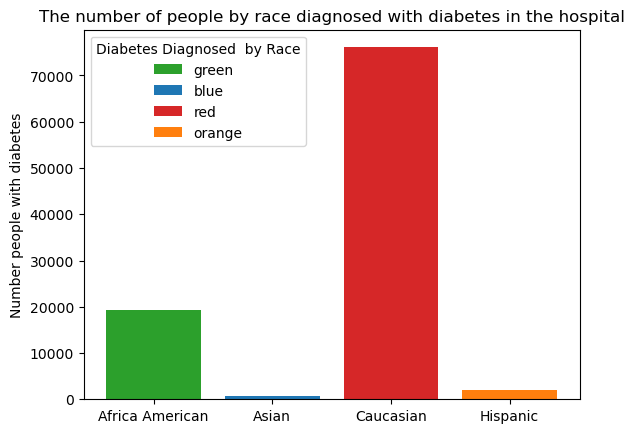

In [53]:
fig, ax = plt.subplots()

Race = ['Africa American', 'Asian','Caucasian','Hispanic']
counts = [19210,641,76099,2037]
bar_labels = ['green', 'blue','red','orange']
bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange']


ax.bar(Race, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Number people with diabetes')
ax.set_title('The number of people by race diagnosed with diabetes in the hospital')
ax.legend(title='Diabetes Diagnosed  by Race')

plt.show()

C:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


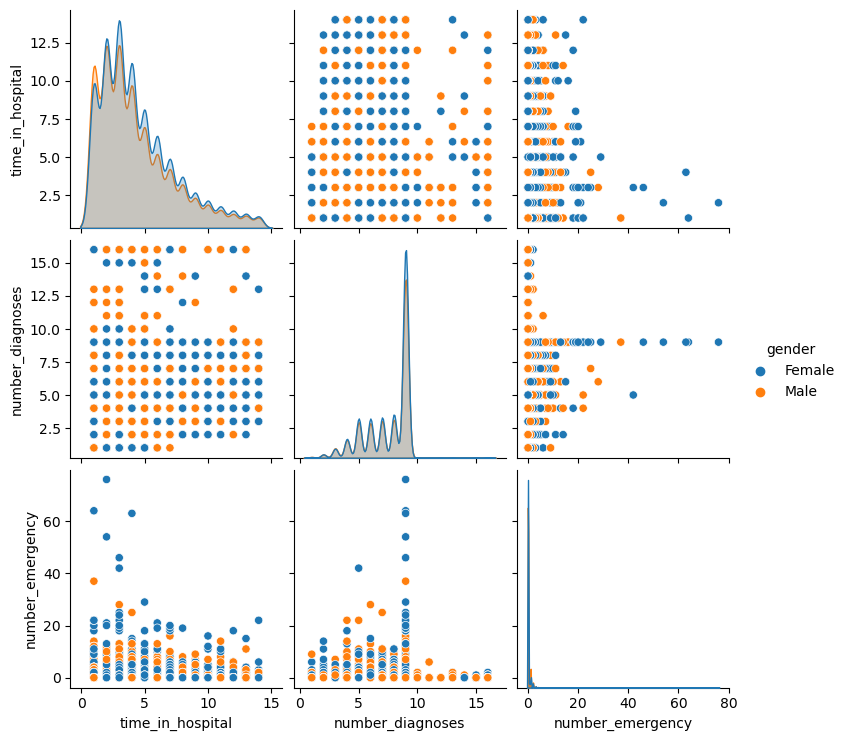

In [54]:
sns.pairplot(initial_comparison_group,hue='gender')

In [ ]:
import matplotlib.pyplot as plt

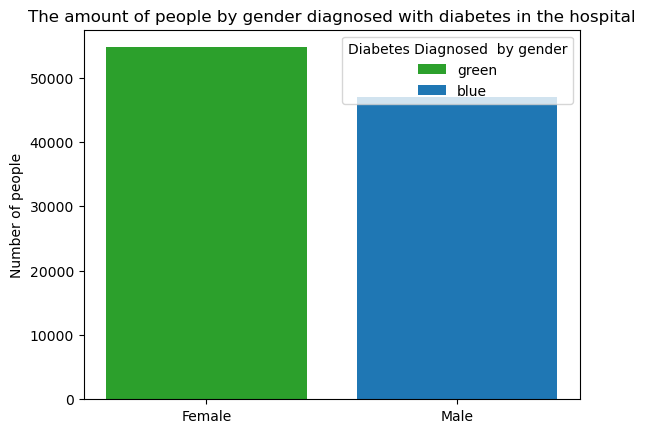

In [56]:
fig, ax = plt.subplots()

Gender = ['Female','Male']
counts = [54708,47055]
bar_labels = ['green', 'blue',]
bar_colors = ['tab:green', 'tab:blue']


ax.bar(Gender, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Number of people')
ax.set_title('The amount of people by gender diagnosed with diabetes in the hospital')
ax.legend(title='Diabetes Diagnosed  by gender')

plt.show()

# In conclusion

In conclusion based on the dataset information, I select the Causian population as the comparison point this race has 76099 of people who had diabetes at the hospital. Overall in the dataset Female is more prone to have diabetes. In my own hypotesis i thought it could be hispanic, since they have a bad heating habit, they eat a lot rice and bread and plantain.
In case of emergency a person with diabetes can last up to 1 to 14 days in hospital.
Metformin and Insulin is the most popular medication for people with diabetes, there also other medication like glyburide  and glipizide. Since i have family member with diabetes i though that metformin and insulin it was the only medication can people used.

 The dataset is very informative that  it can help our society  improved treatment and significant gain in life expectancy for people with diabetes, this type research analysis can address to have prevention and treatment for all the age population of individual with diabetes, to inspired them  to improve their health by maintaining a healthy lifestyle!